# Методы обучения без учителя.
# Цель лабораторной работы: изучение методов кластеризации и снижения размерности.


# Задание:
Выберите набор данных (датасет) для решения задачи обучения без учителя.

Выберите подмножество признаков датасета для анализа. 
Например, подмножество признаков может не включать целевой признак. 
Количество признаков в подмножестве должно быть более двух. Полученный датасет назовем датасетом D1.


С использованием метода главных компонент проведите для датасета D1 снижение размерности данных до двух.
Полученный датасет назовем датасетом D2.

С использованием алгоритма t-SNE также проведите для датасета D1 снижение размерности данных до двух. 
Полученный датасет назовем датасетом D3.


Визуализируйте точки датасетов D2 и D3. В каком случае кластеры выделены наиболее явно?

Для датасетов D1, D2 и D3 проведите кластеризацию с использованием 
как минимум трех методов кластеризации, рассмотренных в лекции. 
Оцените качество кластеризации с использованием метрик, рассмотренных в лекции.
Сделайте выводы о том, какой метод кластеризации и почему оказался лучше для каждого из датасетов.

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import *
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

iris = load_iris()

df = make_dataframe(load_iris)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(df)

sepal length (cm) имеет NAN: 0
sepal width (cm) имеет NAN: 0
petal length (cm) имеет NAN: 0
petal width (cm) имеет NAN: 0
target имеет NAN: 0


In [12]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## С использованием метода главных компонент проведите для датасета D1 снижение размерности данных до двух. 
## Полученный датасет назовем датасетом D2.

In [13]:
# Снижение размерности до 2 методом главных компонент (МГК)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('Доля объясненной дисперсии: {}, сумма={}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))
X_pca[:10]

Доля объясненной дисперсии: [0.92461872 0.05306648], сумма=0.977685206318795


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

## С использованием алгоритма t-SNE также проведите для датасета D1 снижение размерности данных до двух.
## Полученный датасет назовем датасетом D3.



In [15]:

# Снижение размерности до 2 методом t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne[:10]

array([[-21.179821, -15.987457],
       [-18.820745, -14.786243],
       [-18.72989 , -15.860402],
       [-18.384148, -15.514446],
       [-21.16073 , -16.3791  ],
       [-23.326126, -16.00032 ],
       [-18.882215, -16.261795],
       [-20.57479 , -15.567408],
       [-17.6368  , -15.634228],
       [-19.28883 , -15.009454]], dtype=float32)

## Визуализируйте точки датасетов D2 и D3. В каком случае кластеры выделены наиболее явно?

[Text(0.5, 1.0, 'PCA')]

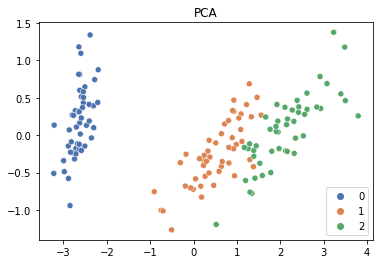

In [20]:

# Визуализация полученных выше двух датасетов
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target, palette="deep").set(title="PCA")

[Text(0.5, 1.0, 't-SNE')]

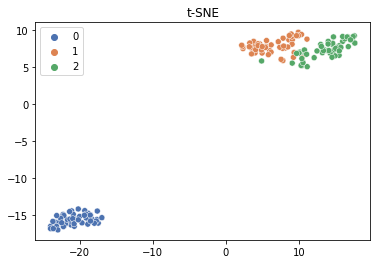

In [23]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=iris.target, palette="deep").set(title="t-SNE")

### Посмотрев на графики, можно сказать, что t-SNE выделил кластеры намного лучше

## Для датасетов D1, D2 и D3 проведите кластеризацию с использованием как минимум трех методов кластеризации, рассмотренных в лекции.

##  Оцените качество кластеризации с использованием метрик, рассмотренных в лекции. 

## Сделайте выводы о том, какой метод кластеризации и почему оказался лучше для каждого из датасетов.

###  Кластеризация с помощью KMeans

##### обычный датасет

In [32]:
k_means = KMeans(n_clusters=3)
k_means_prediction = k_means.fit_predict(X)

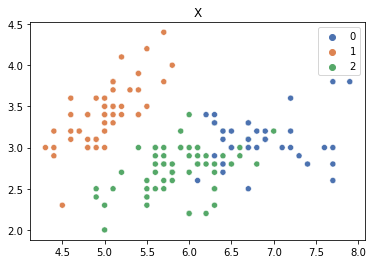

In [33]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=k_means_prediction, palette="deep").set(title="X")
plt.show()


#### датасет преобразованный с помощью PCA

In [36]:
k_means = KMeans(n_clusters=3)
k_means_PCA_prediction = k_means.fit_predict(X_pca)

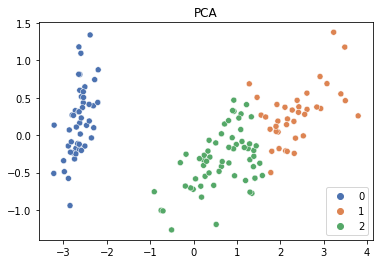

In [37]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=k_means_PCA_prediction, palette="deep").set(title="PCA")
plt.show()

#### датасет преобразованный с помощью t-SNE

In [42]:
k_means = KMeans(n_clusters=3)
k_means_TSNE_prediction = k_means.fit_predict(X_tsne)

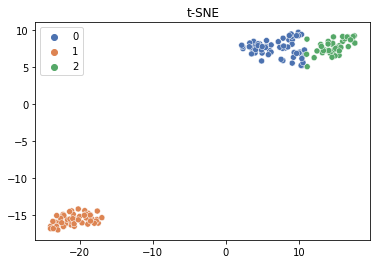

In [43]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=k_means_TSNE_prediction, palette="deep").set(title="t-SNE")
plt.show()

###  Кластеризация с помощью Иерархической кластеризации

##### обычный датасет

In [47]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering_prediction = agg_clustering.fit_predict(X)

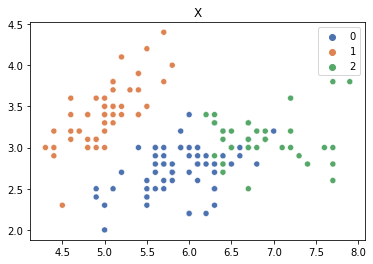

In [49]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg_clustering_prediction, palette="deep").set(title="X")
plt.show()

#### датасет преобразованный с помощью PCA

In [52]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering_PCA_prediction = agg_clustering.fit_predict(X_pca)

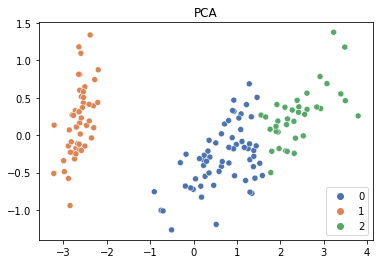

In [53]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_clustering_PCA_prediction, palette="deep").set(title="PCA")
plt.show()

#### датасет преобразованный с помощью t-SNE

In [59]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering_TSNE_prediction = agg_clustering.fit_predict(X_tsne)

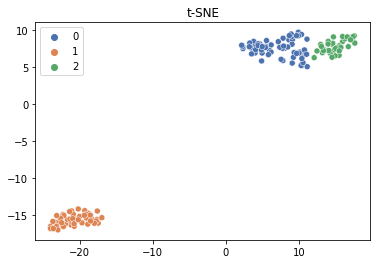

In [60]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=agg_clustering_TSNE_prediction, palette="deep").set(title="t-SNE")
plt.show()

###  Кластеризация с помощью Gaussian mixture models

#### обычный датасет

In [67]:
gaus_mix = GaussianMixture(n_components=3)
gaus_mix_prediction = gaus_mix.fit_predict(X)

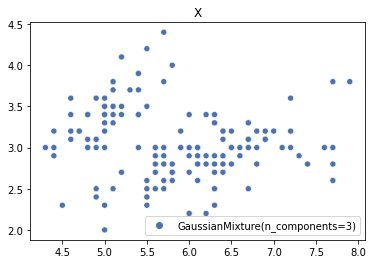

In [68]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=gaus_mix, palette="deep").set(title="X")
plt.show()

#### датасет преобразованный с помощью PCA

In [70]:
gaus_mix = GaussianMixture(n_components=3)
gaus_mix_PCA_prediction = gaus_mix.fit_predict(X_pca)

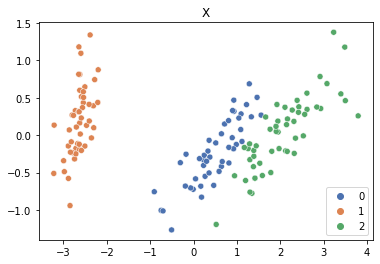

In [75]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gaus_mix_PCA_prediction, palette="deep").set(title="X")
plt.show()

#### датасет преобразованный с помощью t-SNE

In [77]:
gaus_mix = GaussianMixture(n_components=3)
gaus_mix_TSNE_prediction = gaus_mix.fit_predict(X_tsne)

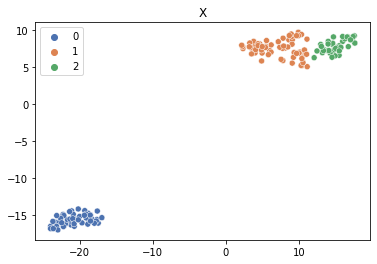

In [78]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=gaus_mix_TSNE_prediction, palette="deep").set(title="X")
plt.show()

### Оценка качества кластеризации

In [158]:
def claster_metrics(method, cluster_datasets, cluster_true_y, datasets_names):
    """
    Вычисление метрик кластеризации
    """
    ari = []
    ami = []
    hl = []
    cl = []
    vl = []
    sl = []
    for X in cluster_datasets:
        temp_cluster = method.fit_predict(X)
        ari.append(adjusted_rand_score(cluster_true_y, temp_cluster))
        ami.append(adjusted_mutual_info_score(cluster_true_y, temp_cluster))
    
        h, c, v = homogeneity_completeness_v_measure(cluster_true_y, temp_cluster)
        hl.append(h)
        cl.append(c)
        vl.append(v)
    
        try:
            sscore = silhouette_score(X, temp_cluster)
        except:
            sscore = None
            
        sl.append(sscore)
    
    result = pd.DataFrame({'Datasets':datasets_names[0:5], 
                           'ARI':ari, 'AMI':ami, 
                           'Homogeneity':hl, 
                           'Completeness':cl, 
                           'V-measure':vl, 'Silhouette':sl})
    return result


In [159]:
cluster_datasets_ = [X, X_pca, X_tsne]
datasets_names_ = ["X", "X_pca", "X_tsne"]
cluster_true_y_ = list(df.target)

In [160]:
# Кластеризация с помощью KMeans
claster_metrics(KMeans(n_clusters=3), cluster_datasets_, cluster_true_y_, datasets_names_)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,0.730238,0.755119,0.751485,0.764986,0.758176,0.552819
1,X_pca,0.716342,0.738655,0.736419,0.747487,0.741912,0.597676
2,X_tsne,0.744526,0.774848,0.769596,0.785902,0.777663,0.687133


In [161]:
claster_metrics(AgglomerativeClustering(n_clusters=3), cluster_datasets_, cluster_true_y_, datasets_names_)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,0.731199,0.767167,0.760801,0.779596,0.770084,0.554324
1,X_pca,0.744526,0.774848,0.769596,0.785902,0.777663,0.598475
2,X_tsne,0.759199,0.803229,0.795982,0.815646,0.805694,0.689878


In [162]:
claster_metrics(GaussianMixture(n_components=3), cluster_datasets_, cluster_true_y_, datasets_names_)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,0.903874,0.898436,0.898326,0.901065,0.899694,0.501176
1,X_pca,0.941045,0.929681,0.930042,0.931060,0.930551,0.531308
2,X_tsne,0.885792,0.868899,0.869675,0.871369,0.870521,0.639023
